In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
sc.settings.verbosity = 3

In [2]:
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

In [3]:
%%R
suppressPackageStartupMessages(library(Seurat))

In [4]:
%%R -o s_genes
s_genes <- cc.genes$s.genes

In [5]:
%%R -o g2m_genes
g2m_genes <- cc.genes$g2m.genes

In [6]:
%%R -o MSC_sce
MSC_sce=readRDS('/data/gaoyuchen/NC_Revision2_CellCycle/MSC_scanpy_integrated.rds')  ##This File include the @integrated assay data of Seurat MSC analysis.

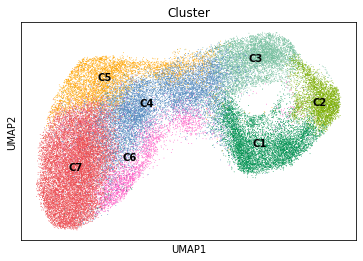

In [7]:
sc.pl.umap(MSC_sce,color=['Cluster'],legend_loc='on data',palette=['#009251',"#7CAE00","#72BE9C",'#5088BF','orange',"#FF5BC6","#EC494E"])

In [8]:
sc.tl.score_genes_cell_cycle(MSC_sce, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    632 total control genes are used. (0:00:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    832 total control genes are used. (0:00:02)
-->     'phase', cell cycle phase (adata.obs)


In [9]:
sc.pp.regress_out(MSC_sce, ['G2M_score','S_score','nCount_RNA', 'percent.mt'])

regressing out ['G2M_score', 'S_score', 'nCount_RNA', 'percent.mt']
    sparse input is densified and may lead to high memory use


... storing 'phase' as categorical


    finished (0:01:51)


In [10]:
sc.pp.scale(MSC_sce)

In [11]:
sc.tl.pca(MSC_sce, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:04)


In [12]:
sc.pp.neighbors(MSC_sce, n_neighbors=10, n_pcs=20)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:20)


In [13]:
sc.tl.umap(MSC_sce)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:40)


In [14]:
sc.tl.leiden(MSC_sce,resolution=0.5)

running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:10)


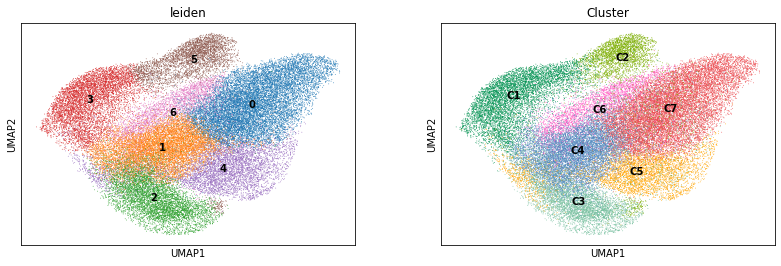

In [15]:
sc.pl.umap(MSC_sce, color=['leiden','Cluster'],legend_loc='on data')